# Homework 4

Name:

Comments for grader:


## Exercise 5.7

Consider the integral

\begin{equation*}
I = \int_0^1 \sin^2 \sqrt{100 x} \>d x
\end{equation*}

**a)** Write a program that uses the adaptive trapezoidal rule method of
  Section 5.3 and Eq. (5.34) to calculate the value of this integral to an
  approximate accuracy of $\epsilon=10^{-6}$ (i.e., correct to six digits
  after the decimal point).  Start with one single integration slice and
  work up from there to two, four, eight, and so forth.  Have your program
  print out the number of slices, its estimate of the integral, and its
  estimate of the error on the integral, for each value of the number of
  slices $N$, until the target accuracy is reached.  (Hint: You should find
  the result is around $I=0.45$.)

In [30]:
"""
Program: ex5.7_adapative_trapezoidal_rule
Purpose: Estimate an integral using the adaptive trapezoidal method
Does it work?: Yes
Other information: 

Part a) Use adapative trapezoidal method of Section 5.3 and eqn 5.34 to calculate
integral to specified accuracy. 
    
"""

import math as m
#import numpy as np

# define integrand function
def f(x):
    return m.sin(m.sqrt(100*x))**2

# define adaptive TR function, arguments: I=previous estimate, (a,b)=integration interval, N=slices for current step
def adaptiveTR(I,a,b,N):
    h = (b-a)/N
    I2 = 0.5*I
    # sum over only odd middle slices
    for k in range(1,N,2):
        I2 += h*f(a+k*h)
    return I2

# main body

# desired accuracy
epsilon = 1e-6 

# Initialize approximation error to something high so it enters the while-loop
error = 9999.

# limits of integration
a=0.0
b=1.0

# Initialize the number of slices
N = 1

# Slice width
h = (b-a)/N

# i keeps track of the number of iterations (not necessary)
i=1

# Calculate first estimate of I using the standard trapezoidal rule, eq 5.3
# Note, for N=1, there is no summation term
I = 0.5*h*(f(a) + f(b))

# print header 
print(f"Target error is {epsilon}.")
print(f'{"Iteration":^11}{"Slices":^8}{"I":^12}{"Error":^12}')
print(f'{i:^11}{N:^8}{I:^12.6f}{"NA":^12}')

# keeps track of the previous estimate of I. Initialize to the first estimate
I_previous = I

# Perform adapative integration until target accuracy reached
while abs(error) > epsilon:
    # increment iteration counter
    i += 1  
    # double the number of slices
    N = 2*N
    I = adaptiveTR(I_previous,a,b,N) # recalculate slice width
    # calculate error on current estimate using eqn. 5.28
    error = (1/3)*(I-I_previous)
    # store current estimate of I for next iteration
    I_previous = I
    print(f"{i:^11}{N:^8}{I:^12.6f}{error:^12.2e}")

Target error is 1e-06.
 Iteration  Slices      I         Error    
     1        1      0.147979       NA     
     2        2      0.325232    5.91e-02  
     3        4      0.512283    6.24e-02  
     4        8      0.402997   -3.64e-02  
     5        16     0.430103    9.04e-03  
     6        32     0.448415    6.10e-03  
     7        64     0.453913    1.83e-03  
     8       128     0.455349    4.79e-04  
     9       256     0.455711    1.21e-04  
    10       512     0.455802    3.03e-05  
    11       1024    0.455825    7.58e-06  
    12       2048    0.455831    1.90e-06  
    13       4096    0.455832    4.74e-07  


### Total Exercise Pts /10

## Exercise 5.9

Debye's theory of solids gives the heat capacity of a solid at
temperature $T$ to be

\begin{equation*}
C_V(T) = 9V\rho k_B \biggl( {T\over\theta_D} \biggr)^3 \int_0^{\theta_D/T}
      {x^4 e^x\over(e^x-1)^2}\>d x,
\end{equation*}

where $V$ is the volume of the solid, $\rho$ is the number density of
atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the so-called
_Debye temperature_, a property of solids that depends on their
density and speed of sound.

**a)** Write a Python function _cv(T)_ that calculates $C_V$ for a
  given value of the temperature, for a sample consisting of 1000 cubic
  centimeters of solid aluminum, which has a number density of
  $\rho=6.022\times10^{28}\,\mathrm{m}^{-3}$ and a Debye temperature of
  $\theta_D=428\,$K.  Use Gaussian quadrature to evaluate the integral,
  with $N=50$ sample points. Test your function using $T=300$K

In [40]:
"""
Program: ex5.9_heat_capacity_of_a_solid
Purpose: Use Gaussian quadrature to calculate the heat capacity of Al
Does it work?: Yes
Other information: 
"""

from gaussxw import gaussxwab
import numpy as np
import scipy.constants as constants

# define the integrand function
# note: need to use numpy.exp since I am passing x as an array
def f(x):
    num = (x**4)*(np.exp(x))
    denom = (np.exp(x)-1.0)**2
    return num/denom

# estimate integral using Gaussian quadrature, arguments: N=sampling point, (a,b)=integration interval
def gaussQ(N,a,b):
    # get the locations of sample points and weights over (a,b) 
    xp,wp = gaussxwab(N,a,b)
    # Perform the integration by summing weights*f(xp)
    I = np.sum(wp*f(xp))
    return I
    
# define a function to calculate Cv of Al for a given temperature T
def cv(T):
    V = 1000.0e-6 # volume of Al, m3
    rho = 6.022e28 # number density of Al, m-3
    theta_D = 428.0 # DeBye temperature, K
    k_B = constants.Boltzmann
    prefactor = (9.0*V*rho*k_B)*(T/theta_D)**3
    a = 0
    b = theta_D/T
    N = 50
    I = gaussQ(N,a,b)
    return prefactor*I

# main body

# test function for T=300K
T = 300.
print(f"Cv at {T}K = {cv(T):.2f} J/K.")

Cv at 300.0K = 2257.80 J/K.


$C_V(T=300K) = $ 2257.80 J/K 

**Pts /10**

**b)** Use your function to make a graph of the heat capacity as a function
  of temperature from $T=5\,$K to $T=500\,$K. Label axes. 

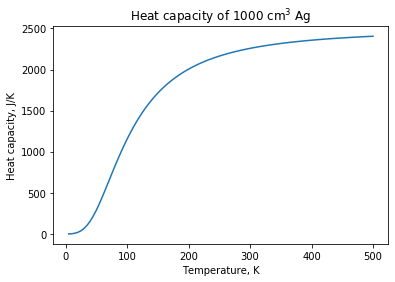

In [46]:
# Part b) Plot Cv over the range T=5-500K

import matplotlib.pyplot as plt

# number of temperatures to sample
npoints = 100

# sample temperature range from 5,500K at npoints and store in array
T_range = np.linspace(5,500, npoints)

# create 1D array to hold Cv(T) at every T
C_V = np.empty([npoints], float)

# calculate the heat capacity at every temperaure using the map function
# need to use map function because gaussxwab works only on scalars 
C_V = list(map(cv, T_range)) 

#plot Cv vs T
plt.plot (T_range, C_V)
plt.xlabel("Temperature, K")
plt.ylabel("Heat capacity, J/K")
plt.title(r"Heat capacity of 1000 cm$^3$ Ag")
plt.show()

**Pts /5**

### Total Exercise Pts /15

## Exercise 5.12

The Planck theory of thermal radiation tells us that in the
(angular) frequency interval $\omega$ to $\omega+d\omega$, a black body
of unit area radiates electromagnetically an amount of thermal energy per
second equal to $I(\omega)\>d\omega$, where

\begin{equation*}
  I(\omega) = {\hbar\over4\pi^2c^2}\,{\omega^3\over(e^{\hbar\omega/k_BT}-1)}.
\end{equation*}

Here $\hbar$ is Planck's constant over $2\pi$, $c$ is the speed of light,
and $k_B$ is Boltzmann's constant.

**a)** Show that the total energy per unit area radiated by a black body is

\begin{equation*}
W = {k_B^4 T^4\over4\pi^2c^2\hbar^3} \int_0^\infty {x^3\over e^x-1}\>d x.
\end{equation*}

**SOLUTION:**

$$
W = \int_0^\infty I(\omega)d\omega
$$

$$
= {\hbar\over4\pi^2c^2} \int_0^\infty \left({\omega^3\over(e^{\hbar\omega/k_BT}-1)}\right)d\omega  
$$

Use a change of variables:

$
x = \frac{\hbar\omega}{k_BT} \rightarrow \omega=\frac{k_BT}{\hbar}x
$

$
d\omega = \frac{k_BT}{\hbar}dx  
$

Determine new limits of integration:

$
\omega=0 \rightarrow x=0      
$

$
\omega=\infty \rightarrow x = \infty
$



Substitute into $W$:

$$
W = {\hbar\over4\pi^2c^2} \int_0^\infty \left( \frac{(\frac{k_BTx}{\hbar})^3}{e^x-1}\right)\frac{k_BT}{\hbar}dx
$$

$$
 \boxed{ = {(k_BT)^4\over4\pi^2\hbar^3c^2} \int_0^\infty \left( \frac{x^3}{e^x-1}\right)d\omega}
$$

**Pts /5**

**b)** Use of a change of variable to transform the infinite integral into a finite one. Show work here and the new finite integral.

$
z = \frac{x}{1+x} \rightarrow x = \frac{z}{1-z}
$

$
dx = \frac{dz}{(1-z)^2}
$

$
x=0 \rightarrow z=0
$

$
x=\infty \rightarrow z=1
$

So the new integral is:

$$
I = \int_0^1 \frac{1}{(1-z)^2} f(\frac{z}{1-z})dz 
$$

$$
\boxed{ \rightarrow  \int_0^1  \frac{z^3}{(1-z)^5(e^{\frac{z}{1-z}}-1)}dz}
$$

**Pts /5**

**c)** Write a program to evaluate the integral (not $W$) in this expression. Explain
  what method you used, and how accurate you think your answer is.

Let's first plot the integrand over the integration range to see if it is well-behaved (not necessary for this problem but good practice):

C:\Users\cbuten\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in expm1
  if __name__ == '__main__':


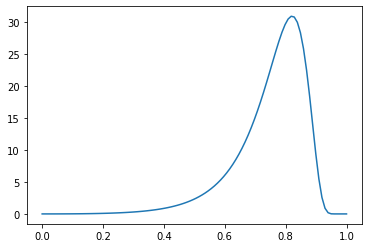

In [50]:
#plot the integrand 
# Note, I get an overflow as z-->1 because x blows up making exp(x) > max float value. 

import numpy as np
import matplotlib.pyplot as plt

def f(z):
    x = z/(1-z)
    return z**3/((1-z)**5*(np.expm1(x)))
    
# avoids divide-by-zero in f(z) when z=1
delta = 1e-15
z = np.linspace(delta,1-delta,100)
y = f(z)
plt.plot(z,y)

In [56]:
"""
Program: ex5.12_stefan_boltzmann_constant
Purpose: Caculate the Stefan-Boltzmann constant using any integration method
Does it work?: Yes
Other information: 

    * part b) calculate the integral 
    
    * I plotted the function first to see if it was a smooth function. It is
    so we can use Gaussian quadrature. 
    
    * I get an OverflowError for N>~30, because exp(x) blows up 
    * when z (or the sampling point) ~ 1 
    
"""
from gaussxw import gaussxwab
import numpy as np

# define integrand
def f(z):
    x = z/(1-z)
    return z**3/((1-z)**5*(np.expm1(x)))

# estimate integral using Gaussian quadrature, arguments: N=sampling point, (a,b)=integration interval
def gaussQ(N,a,b):
    # get the locations of sample points and weights over (a,b) 
    xp,wp = gaussxwab(N,a,b)
    # Perform the integration by summing weights*f(xp)
    I = np.sum(wp*f(xp))
    return I

# main body

# set the number of sampling points
N = 100

# set integration interval
a=0
b=1

# Perform the integration
I = gaussQ(N,a,b)

# estimate error by repeating Gaussian quadrature with 2N sampling points
I2 = gaussQ(2*N,a,b)
error = I2-I

print (f"Using {N} sampling points, the integral (not W) is {I} with approximation error {abs(error):0.2e}.")

Using 100 sampling points, the integral (not W) is 6.493939402266829 with approximation error 1.78e-15.


C:\Users\cbuten\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in expm1


**Integration method and reason for choosing it:**  Gaussian quadrature method because the integral is well-behaved and Gaussian quadrature is very accurate for a small number of sampling points. 

**Estimate of integral:** 6.493939402266829 using N=100 sampling points. 

**Approximation error:** 1.78e-15 based upon the doubling N method. 

**Pts /10**

**d)** Even before Planck gave his theory of thermal radiation around the
  turn of the 20th century, it was known that the total energy $W$ given
  off by a black body per unit area per second followed Stefan's
  law: $W = \sigma T^4$, where $\sigma$ is the Stefan--Boltzmann constant.
  Use your value for the integral above to compute a value for the
  Stefan--Boltzmann constant (in SI units) to three significant figures.
  Check your result against the known value, which you can find in scipy.constants.  You should get good agreement. You can calculate this offline or write code to do so below.

**SOLUTION:**


$
W = {(k_BT)^4\over4\pi^2\hbar^3c^2} \int_0^\infty \left( \frac{x^3}{e^x-1}\right)d\omega
$

which we can write as:

$
W = {(k_BT)^4\over4\pi^2\hbar^3c^2} I
$

where $I$ is the estimate of the integral.

Given the Stefan-Boltzmann Law:

$
W=\sigma T^4
$

where $\sigma$ is the Stefan-Boltzmann constant, we see that we can estimate $\sigma$ as:

$
\sigma = {(k_B)^4\over4\pi^2\hbar^3c^2} I
$

We will compare our estimate of $sigma$ with the true value we get from scipy.constants.



In [63]:
from scipy import constants

k_B = constants.k # Boltzmann constant
c = constants.c # speed of light
hbar = constants.hbar # hbar
true_sigma = constants.sigma # Stefan-Boltzmann constant

# our estimate of sigma
est_sigma = k_B**4/(4*(np.pi**2)*(hbar**3)*(c**2))*I

# relative error
error = abs(100*(est_sigma-true_sigma)/true_sigma)

print (f"Our estimate of Stefan-Boltzmann constant =  {est_sigma:0.2e} W/m^2.")
print (f"The true value of Stefan-Boltzmann constant =  {true_sigma:0.2e} W/m^2.")
print(f"The relative error of our estimate to 3 sig figs is {error:0.2f}%.")

Our estimate of Stefan-Boltzmann constant =  5.67e-08 W/m^2.
The true value of Stefan-Boltzmann constant =  5.67e-08 W/m^2.
The relative error of our estimate to 3 sig figs is 0.00%.


Estimate of Stefan-Boltmann constant: 5.67e-08 $W m^{−2}K^{−4}$

Relative error from true value: 0.00 %

**Pts /5**

### Total Exercise Pts /25

## Exercise 5.14

A uniform square sheet of metal is floating motionless in space (check your textbook for an image representation). The sheet is $10\,$m on a side and of negligible thickness, and it has a mass of 10 metric tonnes.

**a)** Consider the gravitational force due to the plate felt by a point
  mass of $1\,$kg a distance $z$ from the center of the square, in the
  direction perpendicular to the sheet, as shown above.  Show that the
  component of the force along the $z$-axis is
  
\begin{equation*}
F_z = G\sigma z \iint_{-L/2}^{L/2} {d x\,d y\over(x^2+y^2+z^2)^{3/2}}\,,
\end{equation*}

where
$G=6.674\times10^{-11}\,\mathrm{m}^3\,\mathrm{kg}^{-1}\,\mathrm{s}^{-2}$ is
Newton's gravitational constant and $\sigma$ is the mass per unit area of
the sheet.

**Solution:**

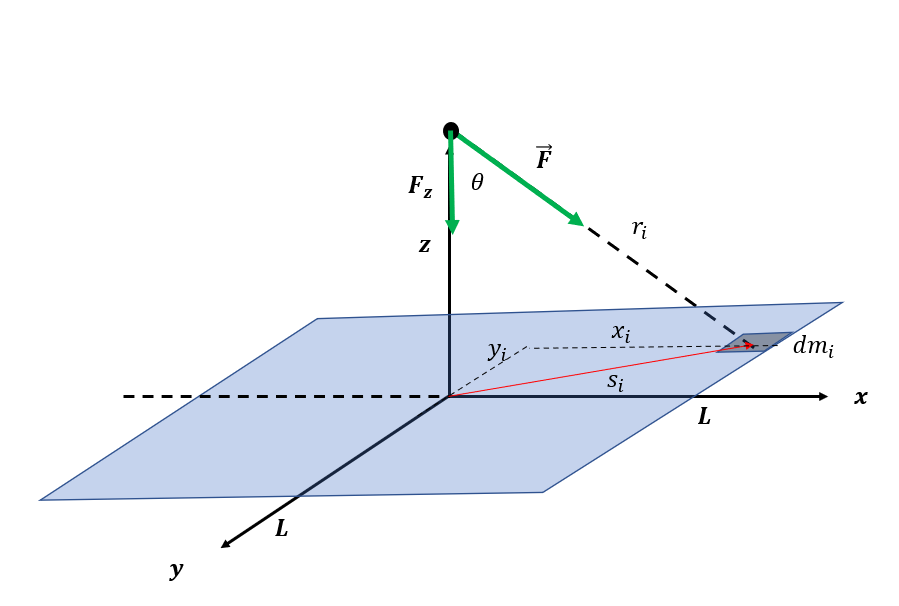

From symmetry, we see the x and y force components cancel.

The z-component of force from differential mass element $dm_i$ is:

$
dF_{z,i} = dF_i\cos{\theta_i}
$

$
\cos{\theta_i} = \frac{z}{r_i}= \frac{z}{\sqrt{z^2+s_i^2}} = \frac{z}{\sqrt{x_i^2+y_i^2+z_i^2}}
$

$
dF_i = \frac{Gm}{r_i^2}dm_i = \frac{Gm}{r_i^2}\sigma dx_i dy_i
$

$$
F_z = \iint_{-L/2}^{L/2}dF\cos(\theta) = \iint_{-L/2}^{L/2} \frac{\sigma Gmz}{r^{3/2}} dx dy = \iint_{-L/2}^{L/2} \frac{\sigma Gmz}{(x^2+y^2+z^2)^{3/2}} dx dy
$$

Since the problem defines m=1kg, can also write this simply as:

$$
\boxed{ F_z = \sigma Gz \iint_{-L/2}^{L/2} \frac{dx dy}{(x^2+y^2+z^2)^{3/2}} }
$$


**Pts /5**

**b)** Write a program to calculate and plot the force as a function of $z$
  from $z=0$ to $z=10\,$m.  For the double integral use (double) Gaussian
  quadrature, as in Eq. (5.82), with 100 sample points along each axis.

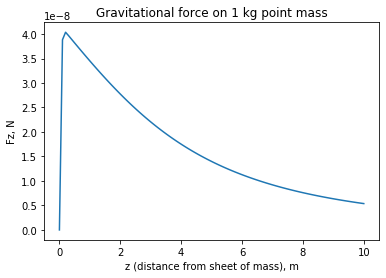

In [70]:
"""
Program: ex5.14_gravitational_pull_of_a_uniform_sheet
Purpose: Peform a double integral using Gaussian quadrature
Does it work?: Yes
Other information: 

"""
from gaussxw import gaussxwab
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

# define the integrand
def f(x,y,z):
    return z/(z**2+x**2+y**2)**(3/2)

# main body

# Define constants of the problem
G = constants.G 
m = 1.0 # point mass, kg
L = 10.0 # sheet length, m
M = 10.0e3 # sheet mass, kg
sigma = M/(L**2) # sheet mass density, kg/m^2
prefactor = G*m*sigma

# Using N=100, we should approximation error down to numerical precision
N = 100

# The integration domain is the same in both the x and y directions
a=-L/2
b=L/2

# Calculate the sample points and weights mapped to integration domain
# Since the integration domain is the same in x,y dimensions we can use these for both dimensions
xk,wk = gaussxwab(N,a,b)

# sample z (the distance point mass is from sheet of mass) from 0 to 10 m
Npoints = 100
zpoints = np.linspace(0,10,Npoints)

# create array to hold the force at each location z
Fz = np.empty(Npoints, float) 

# Calculate the force on the point mass Fz for each location z
# Note I am using the same set of weights and sampling points, but indexing them 
# separately for x and y
for iz in range(Npoints):
    z = zpoints[iz]
    # Initialize the integral sum
    s = 0.0
    # perform the double sum using weights and sampling locations
    for i in range(N):
        for j in range(N):
            s += wk[i]*wk[j]*f(xk[i], xk[j], z)
    # calculate and store the force
    Fz[iz]=prefactor*s
 
plt.plot(zpoints, Fz)
plt.xlabel("z (distance from sheet of mass), m")
plt.ylabel("Fz, N")
plt.title("Gravitational force on 1 kg point mass")
plt.show()

**Pts /10**

**Total Exercise Pts /15**

### Total HW Pts /65